<a href="https://colab.research.google.com/github/erisson23/AIEQ/blob/main/Tarefa1b_Labirinto_Final_Erisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!git clone https://github.com/erisson23/AIEQ
%cd AIEQ

Cloning into 'AIEQ'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), 19.92 KiB | 1.99 MiB/s, done.
/content/AIEQ


In [ ]:
img = cv2.imread('labirinto-de-jogos-lógica-educacional-para-crianças-encontrar-o-caminho-certo-linha-preta-simples-isola.jpg',0)

In [ ]:
img.shape

(800, 800)

In [ ]:
scale_percent = 20 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

In [ ]:
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

In [ ]:
ret, binary_img = cv2.threshold(resized, 127, 255, cv2.THRESH_BINARY)

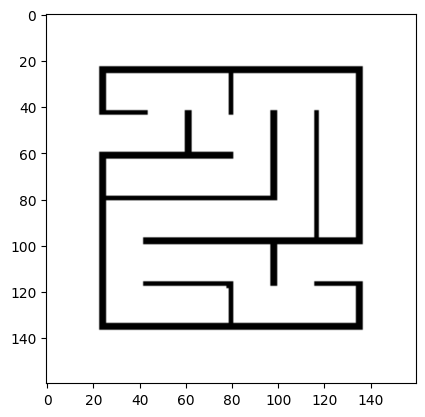

In [ ]:
plt.imshow(binary_img,'gray',vmin=0,vmax=255)

In [ ]:
rows, cols = binary_img.shape
print(rows,cols)

160 160


In [ ]:
def walls(binary_img,rows=rows,cols=cols, row_check = False): 
  # this routine return cols or rows position of walls in a list: 
  #    if you add row_check = True it return rows and otherwise cols
  list_max, list_min = [], []
  for i in range(rows):
    for j in range(cols):
      m =binary_img[i,j]
      if m == 0:
        if row_check == False:
          if j > cols/2:
            list_max.append(j)
          else:
            list_min.append(j)
        else:
          if i > rows/2:
            list_max.append(i)
          else:
            list_min.append(i)
  return list_max, list_min
     

In [ ]:
def freq(list_):
  # this routine return the frequency a item appears in a list as a dict
  frequency = {}
  for item in list_:
    if item in frequency:
        frequency[item] += 1
    else:
        frequency[item] = 1
  return frequency

In [ ]:

# key_max is the most frequent wall position using col_max, row_max, row_min and col_min
# key_max for col_max it represent righ
# key_max for col_min represents left
# key_max for row_max represent botton
# key_max for row_min represent top

col_max, col_min = walls(binary_img)
row_max, row_min = walls(binary_img,row_check=True)
freq_row1, freq_row2 = freq(row_min), freq(row_max)
freq_col1, freq_col2 = freq(col_min), freq(col_max)
list_all = [freq_col1,freq_col2,freq_row1,freq_row2]
labels = ['col min','col max','row min','row max']
k = 0
pos_ =[]
for list_ in list_all:
  key_max = max(list_, key=list_.get)
  print(key_max, list_[key_max], labels[k]) 
  pos_.append(key_max)
  k += 1

23 98 col min
134 98 col max
23 114 row min
134 114 row max


In [ ]:
id_min = [pos_[2], pos_[0]]
id_max = [pos_[3],pos_[1]]
id_min,id_max

([23, 23], [134, 134])

In [ ]:
nref = 7
def find(img, id_min,id_max,rows=rows, cols=cols,N =nref):
  
  positions =[]
  score = []

  for j in [id_min[1], id_max[1]]:
    max_sum = 0
    for i in range(rows-N):
      total = 0
      if i > id_min[0] and i < id_max[0]:
        for k in range(N):
          total += img[i+k,j]
          if max_sum < total:
            idx, idy = i, j
            max_sum = total
    if max_sum > 0:
      positions.append([idx,idy])
      score.append(max_sum)

  for i in [id_min[0],id_max[0]]:
    max_sum = 0
    for j in range(cols-N):
      total = 0
      if j > id_min[1] and j < id_max[1]:
        for k in range(N):
          total += img[i,j+k]
          if max_sum < total:
            idx, idy = i, j
            max_sum = total
    if max_sum > 0:
      positions.append([idx,idy])
      score.append(max_sum)
  k = 0
  x =np.array(score)
  ind = np.argsort(x)
  pos  = [positions[ind[-1]],positions[ind[-2]]]
  sco  = [score[ind[-1]],score[ind[-2]]]

  return pos, sco
        

In [ ]:
find(binary_img,id_min,id_max)

([[100, 134], [44, 23]], [1785, 1785])

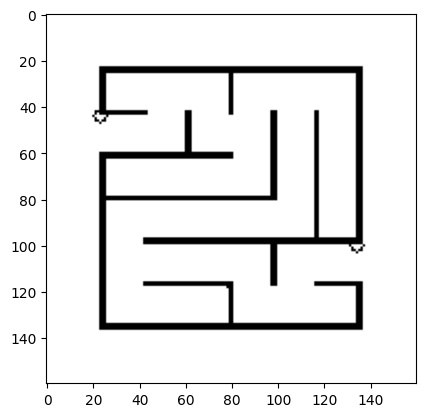

In [ ]:
positions,score =find(binary_img,id_min,id_max)
yc,xc = positions[0]
image = cv2.circle(binary_img, (xc,yc), radius=3, color=[0,0,255], thickness=1)
yc,xc = positions[1]
image = cv2.circle(image, (xc,yc), radius=3, color=[0,0,255], thickness=1)
plt.imshow(image,'gray',vmin=0,vmax=255)

In [ ]:
find(binary_img,id_min,id_max)

([[104, 134], [48, 23]], [1785, 1785])

In [ ]:
target, score = find(binary_img,id_min,id_max)
start_ = target[1]
end_ = target[0]
start_, end_

([48, 23], [104, 134])

In [ ]:
grid = []
# number one for wall and zero for empty
for x in binary_img:
  grid.append(list(x))

for i in range(rows):
  for j in range(cols):
    if grid[i][j]== 0:
      grid[i][j]=1 # 1 if it is wall

for i in range(rows):
  for j in range(cols):
    if grid[i][j]== 255:
      grid[i][j]=0 # 0  if it is empty


for i in range(rows):
  for j in range(cols):
    if i < id_min[0] or i > id_max[0]:
      grid[i][j] = 1

for i in range(rows):
  for j in range(cols):
    if j < id_min[1] or j > id_max[1]:
      grid[i][j] = 1

#grid[20][134] = 2
start = start_[0],start_[1]
end = end_[0], end_[1]

In [ ]:
a = grid

In [ ]:
# https://levelup.gitconnected.com/solve-a-maze-with-python-e9f0580979a1

In [ ]:
def make_step(k):
  for i in range(len(m)):
    for j in range(len(m[i])):
      if m[i][j] == k:
        if i>0 and m[i-1][j] == 0 and a[i-1][j] == 0:
          m[i-1][j] = k + 1
        if j>0 and m[i][j-1] == 0 and a[i][j-1] == 0:
          m[i][j-1] = k + 1
        if i<len(m)-1 and m[i+1][j] == 0 and a[i+1][j] == 0:
          m[i+1][j] = k + 1
        if j<len(m[i])-1 and m[i][j+1] == 0 and a[i][j+1] == 0:
           m[i][j+1] = k + 1

def print_m(m):
    for i in range(len(m)):
        for j in range(len(m[i])):
            print( str(m[i][j]).ljust(2),end=' ')
        print()



m = []
for i in range(len(a)):
    m.append([])
    for j in range(len(a[i])):
        m[-1].append(0)
i,j = start
m[i][j] = 1

k = 0
while m[end[0]][end[1]] == 0:
    k += 1
    make_step(k)


i, j = end
k = m[i][j]
the_path = [(i,j)]
while k > 1:
  if i > 0 and m[i - 1][j] == k-1:
    i, j = i-1, j
    the_path.append((i, j))
    k-=1
  elif j > 0 and m[i][j - 1] == k-1:
    i, j = i, j-1
    the_path.append((i, j))
    k-=1
  elif i < len(m) - 1 and m[i + 1][j] == k-1:
    i, j = i+1, j
    the_path.append((i, j))
    k-=1
  elif j < len(m[i]) - 1 and m[i][j + 1] == k-1:
    i, j = i, j+1
    the_path.append((i, j))
    k -= 1

print_m(m)
print(the_path)

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0 

In [ ]:
#image = binary_img
ret, image = cv2.threshold(resized, 127, 255, cv2.THRESH_BINARY)
for xy in the_path:
  yc,xc = xy[0],xy[1]
  cv2.circle(image, (xc,yc), radius=3, color=[0,0,255], thickness=1)

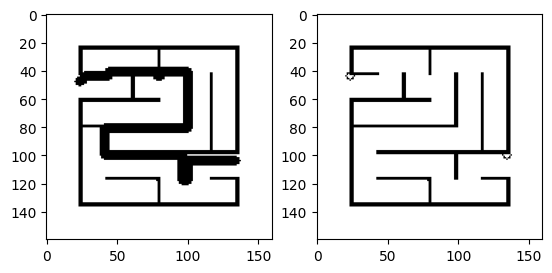

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(image,'gray',vmin=0,vmax=255)
plt.subplot(1, 2, 2)
plt.imshow(binary_img,'gray',vmin=0,vmax=255)
plt.show()